In [2]:
import os
os.chdir("/home/dat/Workspace/sd-maskrcnn")

import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.color
import tools.train
from autolab_core import YamlConfig
from mrcnn import model as modellib
from sd_maskrcnn.config import MaskConfig
from tools.evaluate import detect
from tools.resize import scale_to_square
%matplotlib inline

In [7]:
mode = "HSD"
config = YamlConfig("cfg/train.yaml")
config["dataset"]["images"] = f"{mode}_ims"
config["model"]["settings"]["name"] = f"sdmaskrcnn_finetune_{mode}"
config["save_conf_name"] = f"sdmaskrcnn_finetune_{mode}_00.yaml"

In [8]:
tools.train.train(config)


Configurations:
BACKBONE                       resnet35
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

/home/dat/.virtualenvs/sdmaskrcnn/lib/python3.6/site-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/10
150/150 [==============================] - 517s 3s/step - loss: 1.8503 - rpn_class_loss: 0.0742 - rpn_bbox_loss: 0.4739 - mrcnn_class_loss: 0.3234 - mrcnn_bbox_loss: 0.4656 - mrcnn_mask_loss: 0.5132 - val_loss: 1.4911 - val_rpn_class_loss: 0.0297 - val_rpn_bbox_loss: 0.4079 - val_mrcnn_class_loss: 0.1941 - val_mrcnn_bbox_loss: 0.4518 - val_mrcnn_mask_loss: 0.4075
Epoch 2/10
150/150 [==============================] - 242s 2s/step - loss: 1.3440 - rpn_class_loss: 0.0340 - rpn_bbox_loss: 0.2861 - mrcnn_class_loss: 0.2371 - mrcnn_bbox_loss: 0.3649 - mrcnn_mask_loss: 0.4218 - val_loss: 1.5041 - val_rpn_class_loss: 0.0316 - val_rpn_bbox_loss: 0.4942 - val_mrcnn_class_loss: 0.1730 - val_mrcnn_bbox_loss: 0.4116 - val_mrcnn_mask_loss: 0.3936
Epoch 3/10
150/150 [==============================] - 138s 918ms/step - loss: 1.2826 - rpn_class_loss: 0.0340 - rpn_bbox_loss: 0.2822 - mrcnn_class_loss: 0.2228 - mrcnn_bbox_loss: 0.3381 - mrcnn_mask_loss: 0.4056 - val_loss: 1.3973 - val_rpn_clas

In [9]:
config = YamlConfig("cfg/benchmark.yaml")
config["model"]["path"] = "models/sdmaskrcnn_finetune_hsd20181220T0854/mask_rcnn_sdmaskrcnn_finetune_hsd_0010.h5"

inference_config = MaskConfig(config["model"]["settings"])
inference_config.GPU_COUNT = 1
inference_config.IMAGES_PER_GPU = 1

model_dir, _ = os.path.split(config['model']['path'])
model = modellib.MaskRCNN(mode=config['model']['mode'], config=inference_config, model_dir=model_dir)
print("Loading weights from ", config['model']['path'])
model.load_weights(config['model']['path'], by_name=True)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


Loading weights from  models/sdmaskrcnn_finetune_hsd20181220T0854/mask_rcnn_sdmaskrcnn_finetune_hsd_0010.h5
Re-starting from epoch 10


{'rois': array([[248, 242, 340, 323],
       [139, 358, 232, 459],
       [202, 303, 334, 405],
       [159, 134, 268, 290],
       [ 99, 128, 180, 279],
       [113, 332, 179, 397],
       [318, 308, 427, 405],
       [110, 102, 190, 184],
       [188, 443, 262, 498],
       [184, 384, 335, 483],
       [226, 111, 297, 262],
       [152, 102, 252, 150],
       [144, 322, 181, 359],
       [310, 385, 353, 442],
       [332, 397, 386, 485],
       [138, 237, 262, 299],
       [196, 106, 278, 207],
       [263, 380, 320, 438],
       [163, 406, 258, 481],
       [147, 113, 187, 150],
       [305, 310, 339, 406]], dtype=int32), 'scores': array([0.9991867 , 0.99881387, 0.9977708 , 0.99565107, 0.99515176,
       0.9947466 , 0.9662811 , 0.95680237, 0.9511602 , 0.9493015 ,
       0.9368528 , 0.90461034, 0.87603396, 0.8715383 , 0.8628569 ,
       0.84597296, 0.8296505 , 0.79277116, 0.7573862 , 0.7559167 ,
       0.7082836 ], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

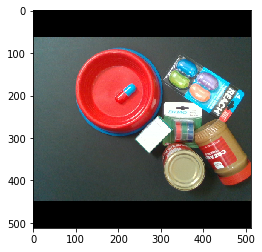

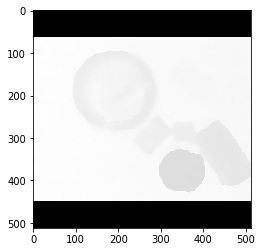

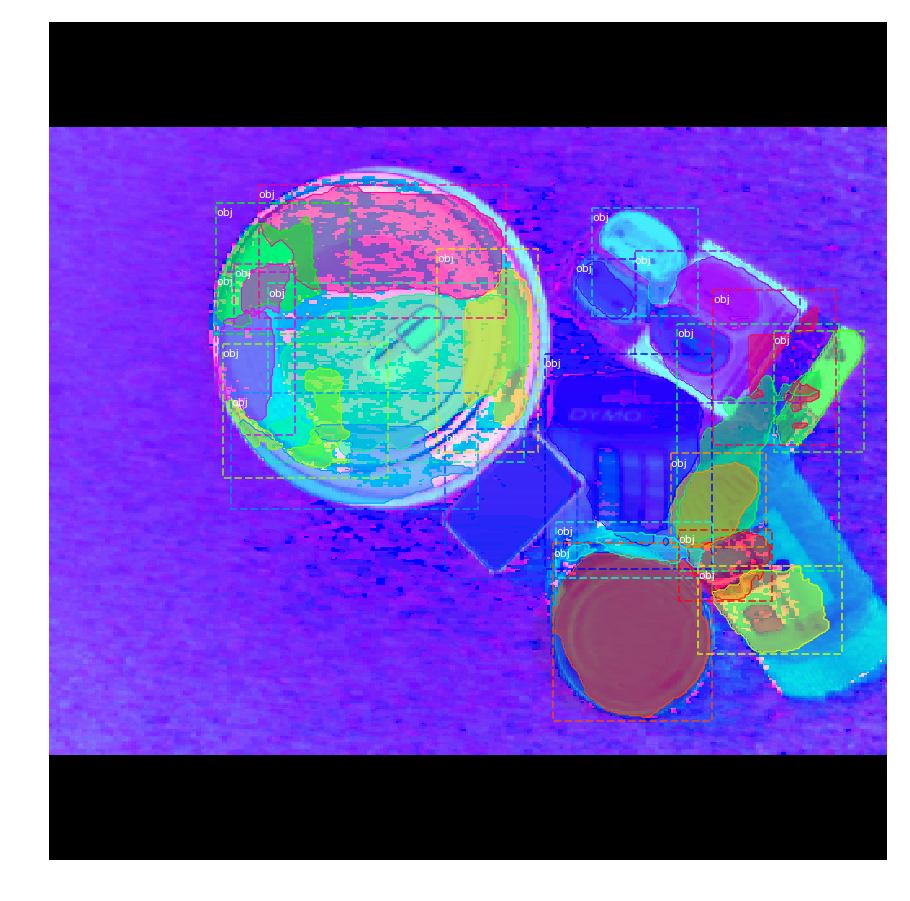

{'rois': array([[124, 202, 215, 310],
       [351, 197, 437, 259],
       [326, 321, 426, 423],
       [174, 110, 210, 218],
       [121, 293, 226, 370],
       [176, 415, 244, 465],
       [224, 225, 307, 373],
       [264, 310, 333, 427],
       [253, 169, 356, 242],
       [275, 285, 325, 333],
       [179, 130, 367, 248],
       [273, 362, 309, 408],
       [235, 238, 330, 297],
       [239, 336, 282, 417],
       [228, 269, 279, 351]], dtype=int32), 'scores': array([0.9992761 , 0.99851066, 0.9980263 , 0.9910075 , 0.99066   ,
       0.9893607 , 0.9852208 , 0.9851731 , 0.9617151 , 0.9604787 ,
       0.93975675, 0.83933276, 0.80008036, 0.784021  , 0.77503026],
      dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 15)


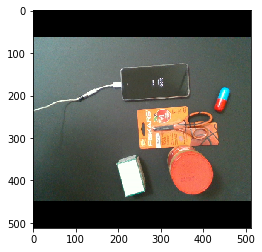

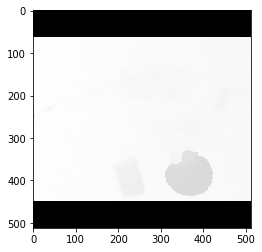

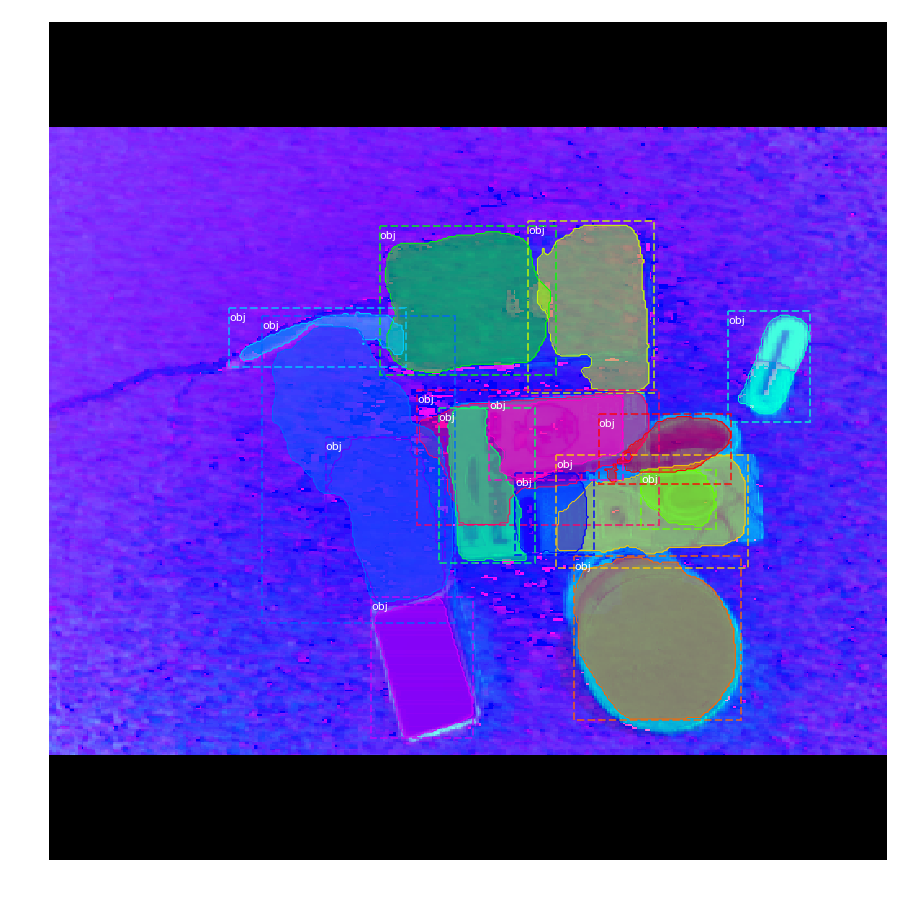

{'rois': array([[155, 330, 222, 389],
       [349, 279, 401, 336],
       [215, 306, 300, 396],
       [156, 142, 194, 291],
       [158, 149, 195, 192],
       [115, 168, 156, 228],
       [195, 381, 288, 447],
       [283, 309, 327, 390],
       [162, 118, 273, 216],
       [260, 279, 328, 342],
       [250, 277, 378, 383],
       [114, 248, 199, 301],
       [247, 122, 302, 189]], dtype=int32), 'scores': array([0.99899596, 0.99777275, 0.9950858 , 0.9817594 , 0.95636636,
       0.9509651 , 0.8811067 , 0.8636901 , 0.85885936, 0.8293439 ,
       0.7478312 , 0.7301599 , 0.71768826], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 13)


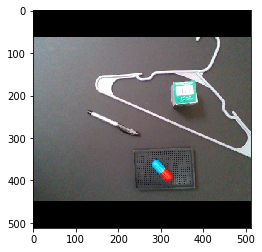

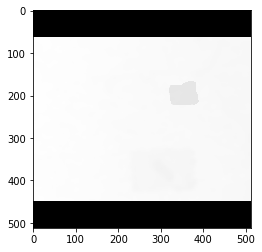

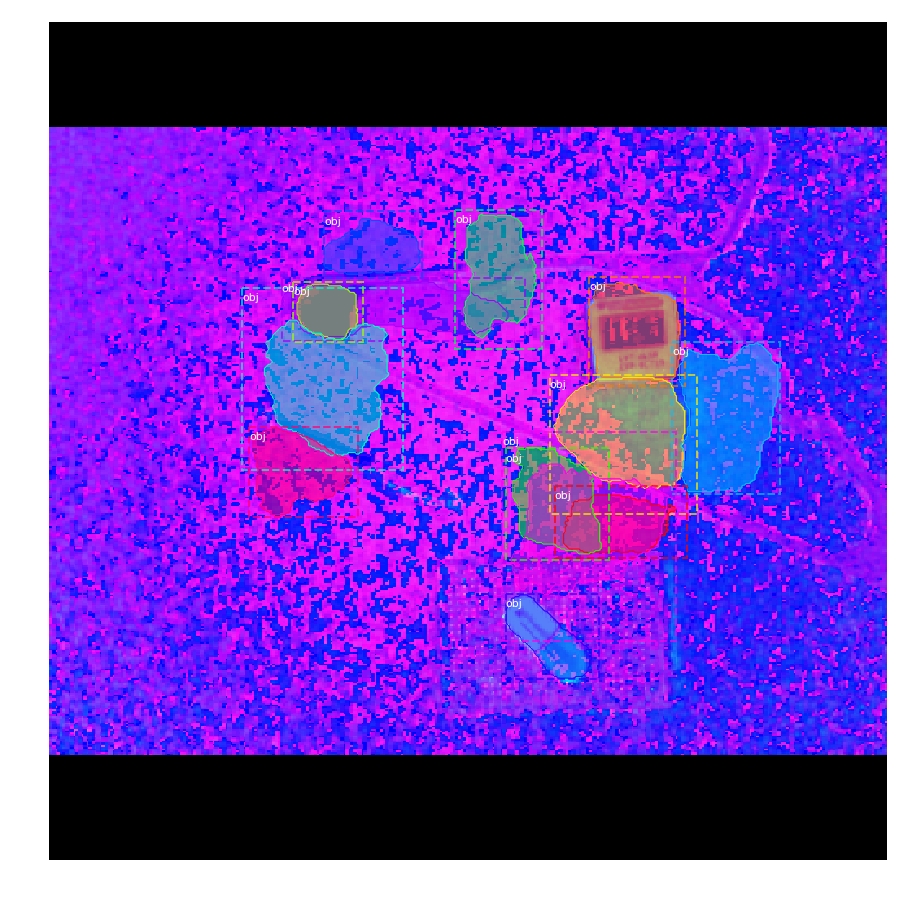

{'rois': array([[263, 148, 371, 302],
       [184, 399, 241, 469],
       [269,  82, 392, 155],
       [373, 122, 413, 256],
       [158, 312, 305, 403],
       [170, 232, 257, 340],
       [ 98, 129, 167, 183],
       [237, 289, 315, 343],
       [283, 318, 330, 407],
       [237,  69, 300, 129],
       [227, 130, 266, 222],
       [173, 112, 272, 227],
       [319, 350, 366, 420],
       [269, 386, 305, 419],
       [299, 304, 357, 413],
       [268, 152, 360, 211],
       [322, 179, 367, 223],
       [159, 215, 247, 284]], dtype=int32), 'scores': array([0.9986582 , 0.9972101 , 0.9963774 , 0.99624217, 0.99558747,
       0.9758887 , 0.97442436, 0.9706141 , 0.9667031 , 0.9665832 ,
       0.9555651 , 0.92529565, 0.90945584, 0.8859793 , 0.83422834,
       0.7796214 , 0.7720487 , 0.7030262 ], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 18)


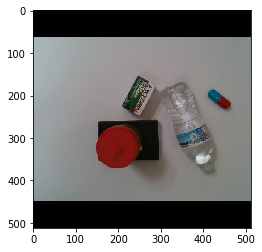

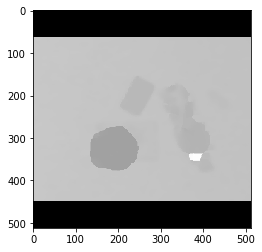

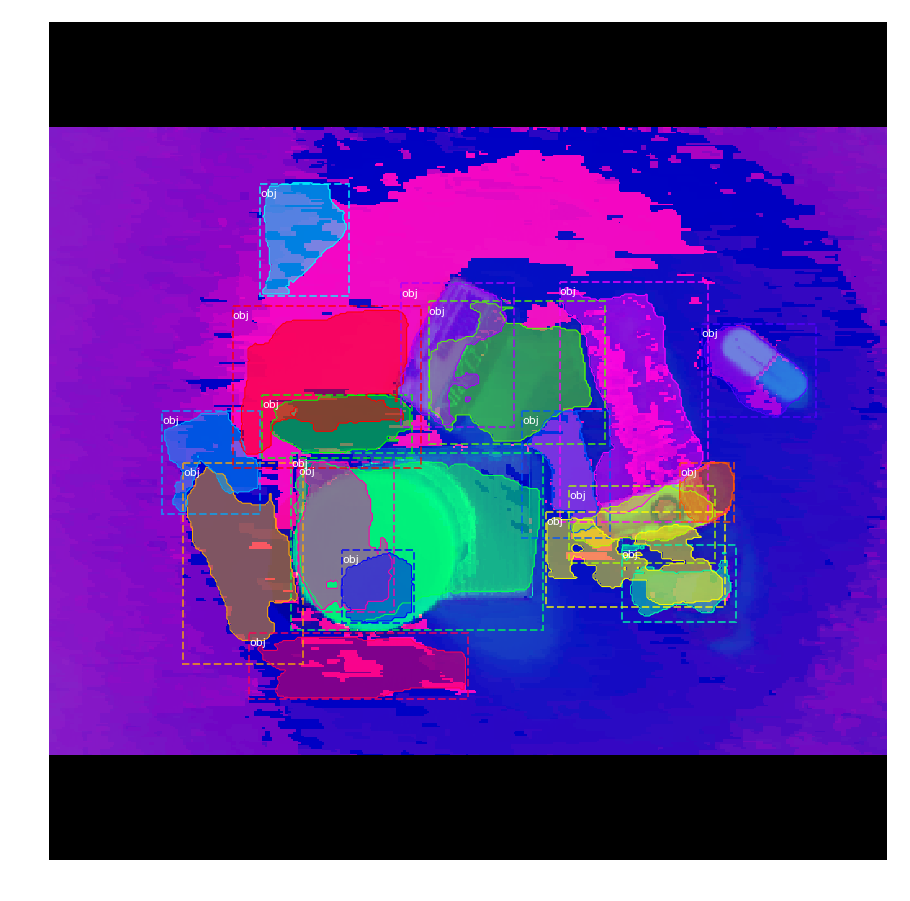

{'rois': array([[206, 155, 325, 292],
       [256, 256, 374, 362],
       [322, 394, 387, 482],
       [203,  78, 260, 136],
       [135, 119, 241, 263],
       [109, 123, 155, 211],
       [228, 115, 271, 206],
       [270, 454, 324, 491],
       [179, 277, 280, 366],
       [201, 404, 252, 504],
       [289, 201, 327, 254],
       [244, 402, 333, 494],
       [267, 417, 328, 459],
       [ 94, 338, 146, 412],
       [135, 310, 168, 419],
       [169, 303, 345, 410],
       [312, 195, 349, 267],
       [116,  98, 194, 203],
       [351, 245, 381, 298]], dtype=int32), 'scores': array([0.9997458 , 0.99971753, 0.99560994, 0.98792785, 0.9873072 ,
       0.9818034 , 0.97463256, 0.9700884 , 0.96251035, 0.95847714,
       0.936612  , 0.9096333 , 0.86820203, 0.82913136, 0.8266267 ,
       0.8258133 , 0.80110073, 0.778904  , 0.7109142 ], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)}
(512, 512, 19)


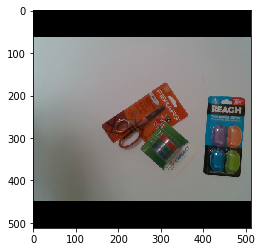

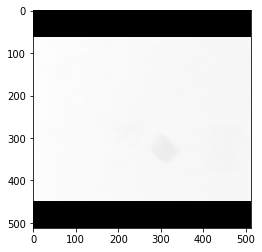

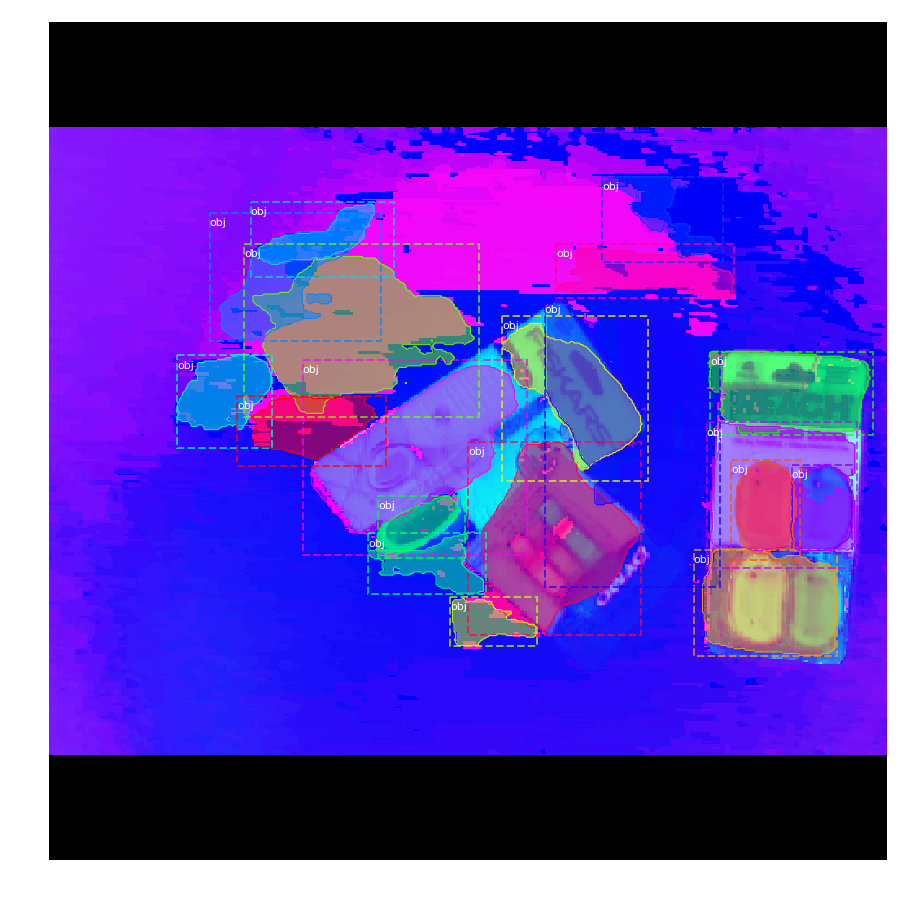

{'rois': array([[166, 425, 234, 498],
       [180, 291, 301, 419],
       [210,  80, 296, 127],
       [154, 103, 263, 193],
       [121, 110, 168, 209],
       [281, 264, 379, 407],
       [182, 216, 340, 318],
       [183, 160, 232, 249],
       [ 99, 152, 124, 231],
       [338, 182, 404, 254],
       [268, 108, 316, 154],
       [275,  45, 343, 138],
       [236, 122, 288, 219],
       [284, 296, 332, 389],
       [219, 153, 352, 231],
       [221, 320, 294, 388],
       [249, 138, 278, 197],
       [237, 263, 327, 327],
       [103, 373, 174, 442],
       [142, 267, 187, 405]], dtype=int32), 'scores': array([0.9994066 , 0.99798775, 0.9955205 , 0.9887736 , 0.98845345,
       0.9848801 , 0.9826895 , 0.98249704, 0.95146143, 0.9400726 ,
       0.9087477 , 0.903262  , 0.8885138 , 0.8725084 , 0.850836  ,
       0.83040816, 0.79246676, 0.7902166 , 0.776365  , 0.7744517 ],
      dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=in

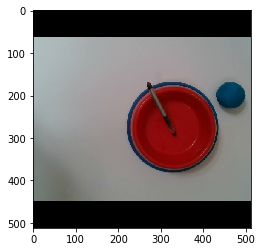

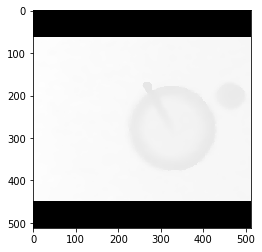

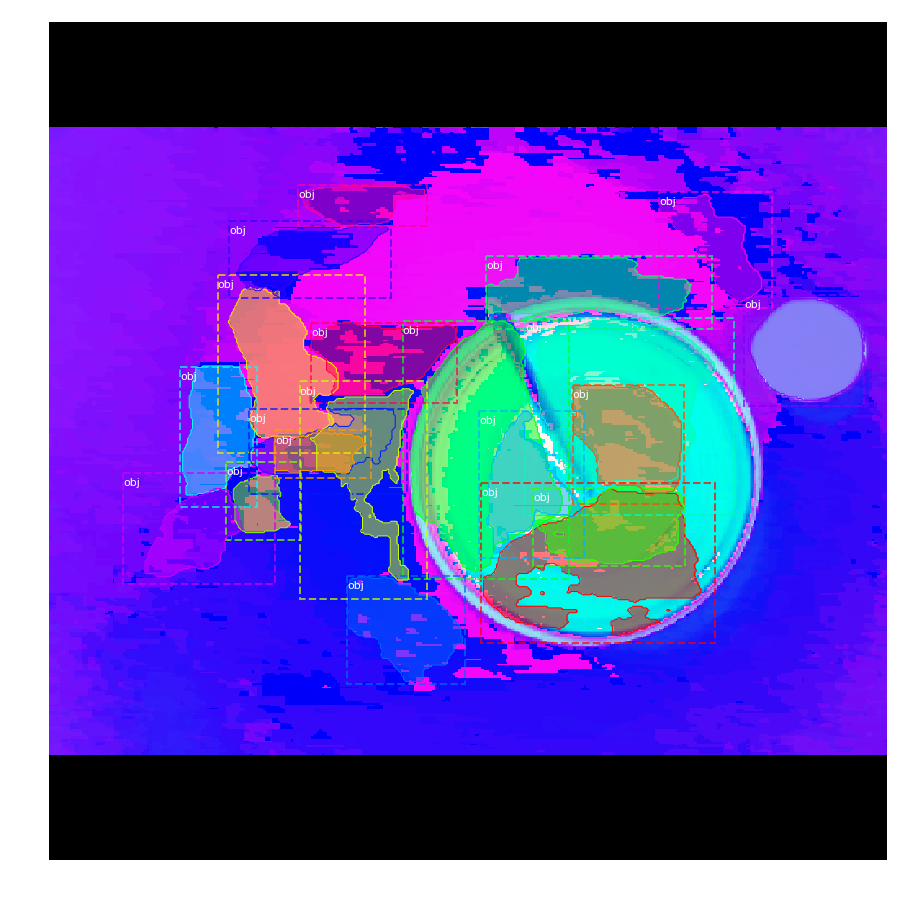

{'rois': array([[208, 257, 312, 363],
       [325, 109, 405, 265],
       [279,  87, 332, 265],
       [215,  72, 281, 223],
       [275,  94, 318, 133],
       [146, 317, 252, 426],
       [111, 366, 261, 488],
       [241,  97, 299, 263],
       [279,  44, 365, 106],
       [258, 436, 315, 484],
       [141,  81, 201, 113],
       [387,  85, 412, 241],
       [348,  48, 389, 129],
       [187,  62, 255, 107],
       [117, 370, 168, 509],
       [218, 135, 242, 213],
       [160, 161, 229, 340],
       [311, 101, 335, 272],
       [250, 403, 326, 472],
       [295, 277, 337, 354],
       [ 89, 266, 176, 329],
       [139, 448, 182, 510]], dtype=int32), 'scores': array([0.996545  , 0.9859291 , 0.98479515, 0.9764741 , 0.97362095,
       0.9682493 , 0.9652496 , 0.965127  , 0.9375666 , 0.92551327,
       0.8611846 , 0.85957754, 0.83311975, 0.8317099 , 0.8002472 ,
       0.7902667 , 0.78441304, 0.781083  , 0.76855874, 0.7509521 ,
       0.730499  , 0.71369505], dtype=float32), 'class_ids':

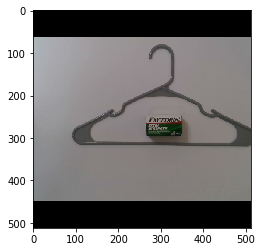

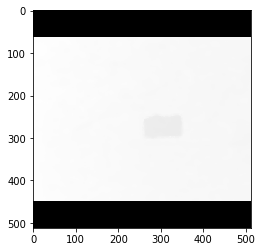

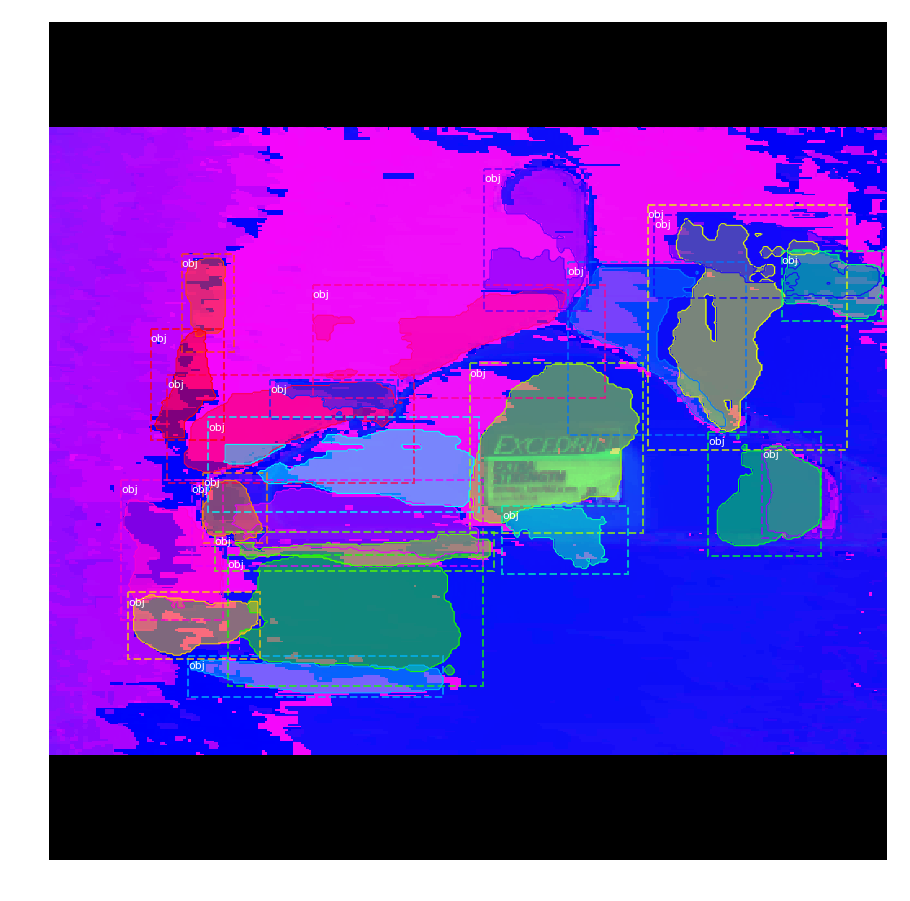

{'rois': array([[259, 394, 333, 471],
       [154, 273, 260, 370],
       [248, 209, 343, 337],
       [315, 354, 351, 410],
       [227, 310, 318, 413],
       [231, 155, 286, 273],
       [185, 204, 258, 276],
       [324, 214, 368, 324],
       [291, 139, 380, 285],
       [278, 146, 345, 238],
       [227, 203, 260, 265],
       [107, 289, 163, 354],
       [210, 201, 238, 267],
       [132, 264, 161, 309],
       [301,  75, 350, 139],
       [275,  83, 313, 145]], dtype=int32), 'scores': array([0.99999356, 0.9997011 , 0.9767428 , 0.9679735 , 0.9631238 ,
       0.9487404 , 0.9461224 , 0.94529444, 0.9386777 , 0.93636274,
       0.9058061 , 0.894988  , 0.89458835, 0.8773571 , 0.8310193 ,
       0.8179082 ], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 16)


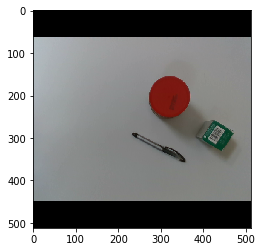

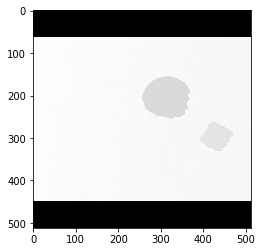

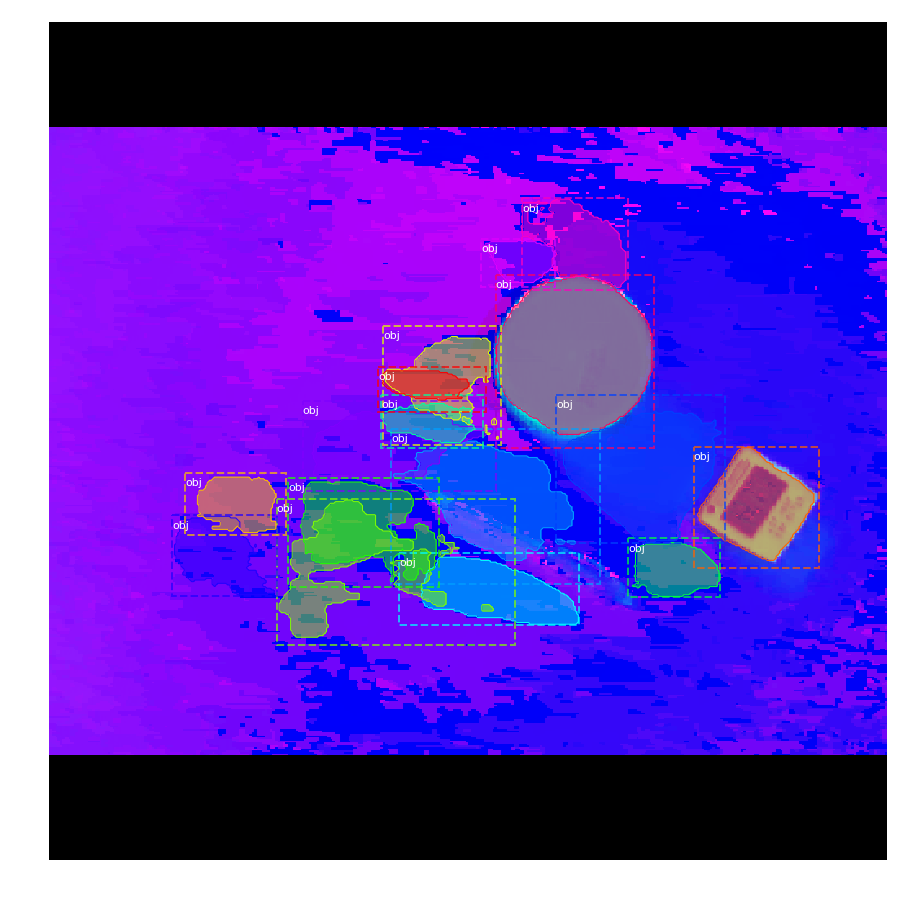

In [10]:
COLOR_DIR = "data/color"
DEPTH_DIR = "data/depth"

for fname in sorted(os.listdir(COLOR_DIR)):
    color = scale_to_square(cv2.imread(os.path.join(COLOR_DIR, fname)))[..., ::-1]
    depth = scale_to_square(cv2.imread(os.path.join(DEPTH_DIR, fname)))
    v_pad, h_pad = (512 - color.shape[0]) // 2, (512 - color.shape[1]) // 2
    color = cv2.copyMakeBorder(color, v_pad, v_pad, h_pad, h_pad, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    depth = cv2.copyMakeBorder(depth, v_pad, v_pad, h_pad, h_pad, cv2.BORDER_CONSTANT, value=0)
    
    plt.figure()
    plt.imshow(color)
    plt.figure()
    plt.imshow(depth)
    
    hsv = (skimage.color.convert_colorspace(color, "RGB", "HSV") * 255).astype(np.uint8)
    inp_img = np.zeros(hsv.shape)
    inp_img[..., 0] = hsv[..., 0]
    inp_img[..., 1] = hsv[..., 1]
    inp_img[..., 2] = depth[..., 0]
    detect(model, inp_img)